# Análisis de Datos - Estilos y Patrones de Sueño
**Autor:** Josue Miranda Gutierrez  
**Objetivo:** Realizar un análisis exploratorio de datos (EDA) sobre el dataset *Lifestyle and Sleep Patterns* de Kaggle.  
Incluye: exploración, tratamiento de valores faltantes, análisis univariante, creación de variable objetivo, filtrado de outliers, correlaciones y división del dataset en entrenamiento y prueba.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 100
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

os.makedirs("imagenes", exist_ok=True)
os.makedirs("datos", exist_ok=True)

print("="*70)
print("ANÁLISIS DE PATRONES DE SUEÑO Y ESTILO DE VIDA")
print("="*70)

ruta = r"C:\Users\josue\UNI\I.A\IA\Proyecto_Sueno\ANALISIS BINARIO\datos\Sleep_health_and_lifestyle_dataset.csv"
df = pd.read_csv(ruta)

print(f"\n✅ Dataset cargado correctamente")
print(f"📊 Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas\n")

print("📋 Información del dataset:")
df.info()

print("\n🔍 Primeras 5 filas:")
display(df.head())

print("\n📊 Estadísticas descriptivas:")
display(df.describe())

ANÁLISIS DE PATRONES DE SUEÑO Y ESTILO DE VIDA

✅ Dataset cargado correctamente
📊 Dimensiones: 374 filas × 13 columnas

📋 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea



📊 Estadísticas descriptivas:


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## 2. Tratamiento de Valores Faltantes

In [13]:
print("\n" + "="*70)
print("2. TRATAMIENTO DE VALORES FALTANTES")
print("="*70)

print("\n⚠️ Valores nulos por columna:")
nulos = df.isnull().sum()
print(nulos[nulos > 0])

print("\n💡 EXPLICACIÓN:")
print("La columna 'Sleep Disorder' tiene valores nulos (58.6% del dataset).")
print("Estos valores NO son errores, sino personas SIN trastornos del sueño.")
print("Por lo tanto, NO eliminaremos estas filas.")
print("Los valores nulos se reemplazarán con 'None' para indicar ausencia de trastorno.\n")

df['Sleep Disorder'].fillna('None', inplace=True)

print(f"✅ Valores nulos tratados. Total restante: {df.isnull().sum().sum()}")


2. TRATAMIENTO DE VALORES FALTANTES

⚠️ Valores nulos por columna:
Sleep Disorder    219
dtype: int64

💡 EXPLICACIÓN:
La columna 'Sleep Disorder' tiene valores nulos (58.6% del dataset).
Estos valores NO son errores, sino personas SIN trastornos del sueño.
Por lo tanto, NO eliminaremos estas filas.
Los valores nulos se reemplazarán con 'None' para indicar ausencia de trastorno.

✅ Valores nulos tratados. Total restante: 0


## 3. Análisis Univariante


3. ANÁLISIS UNIVARIANTE

📊 Analizando distribuciones individuales de cada variable...

🔢 VARIABLES NUMÉRICAS:

  • Age:
    - Media: 42.18
    - Mediana: 43.00
    - Desv. Std: 8.67
    - Rango: [27.0, 59.0]

  • Sleep Duration:
    - Media: 7.13
    - Mediana: 7.20
    - Desv. Std: 0.80
    - Rango: [5.8, 8.5]

  • Quality of Sleep:
    - Media: 7.31
    - Mediana: 7.00
    - Desv. Std: 1.20
    - Rango: [4.0, 9.0]

  • Physical Activity Level:
    - Media: 59.17
    - Mediana: 60.00
    - Desv. Std: 20.83
    - Rango: [30.0, 90.0]

  • Stress Level:
    - Media: 5.39
    - Mediana: 5.00
    - Desv. Std: 1.77
    - Rango: [3.0, 8.0]

  • Heart Rate:
    - Media: 70.17
    - Mediana: 70.00
    - Desv. Std: 4.14
    - Rango: [65.0, 86.0]

  • Daily Steps:
    - Media: 6816.84
    - Mediana: 7000.00
    - Desv. Std: 1617.92
    - Rango: [3000.0, 10000.0]



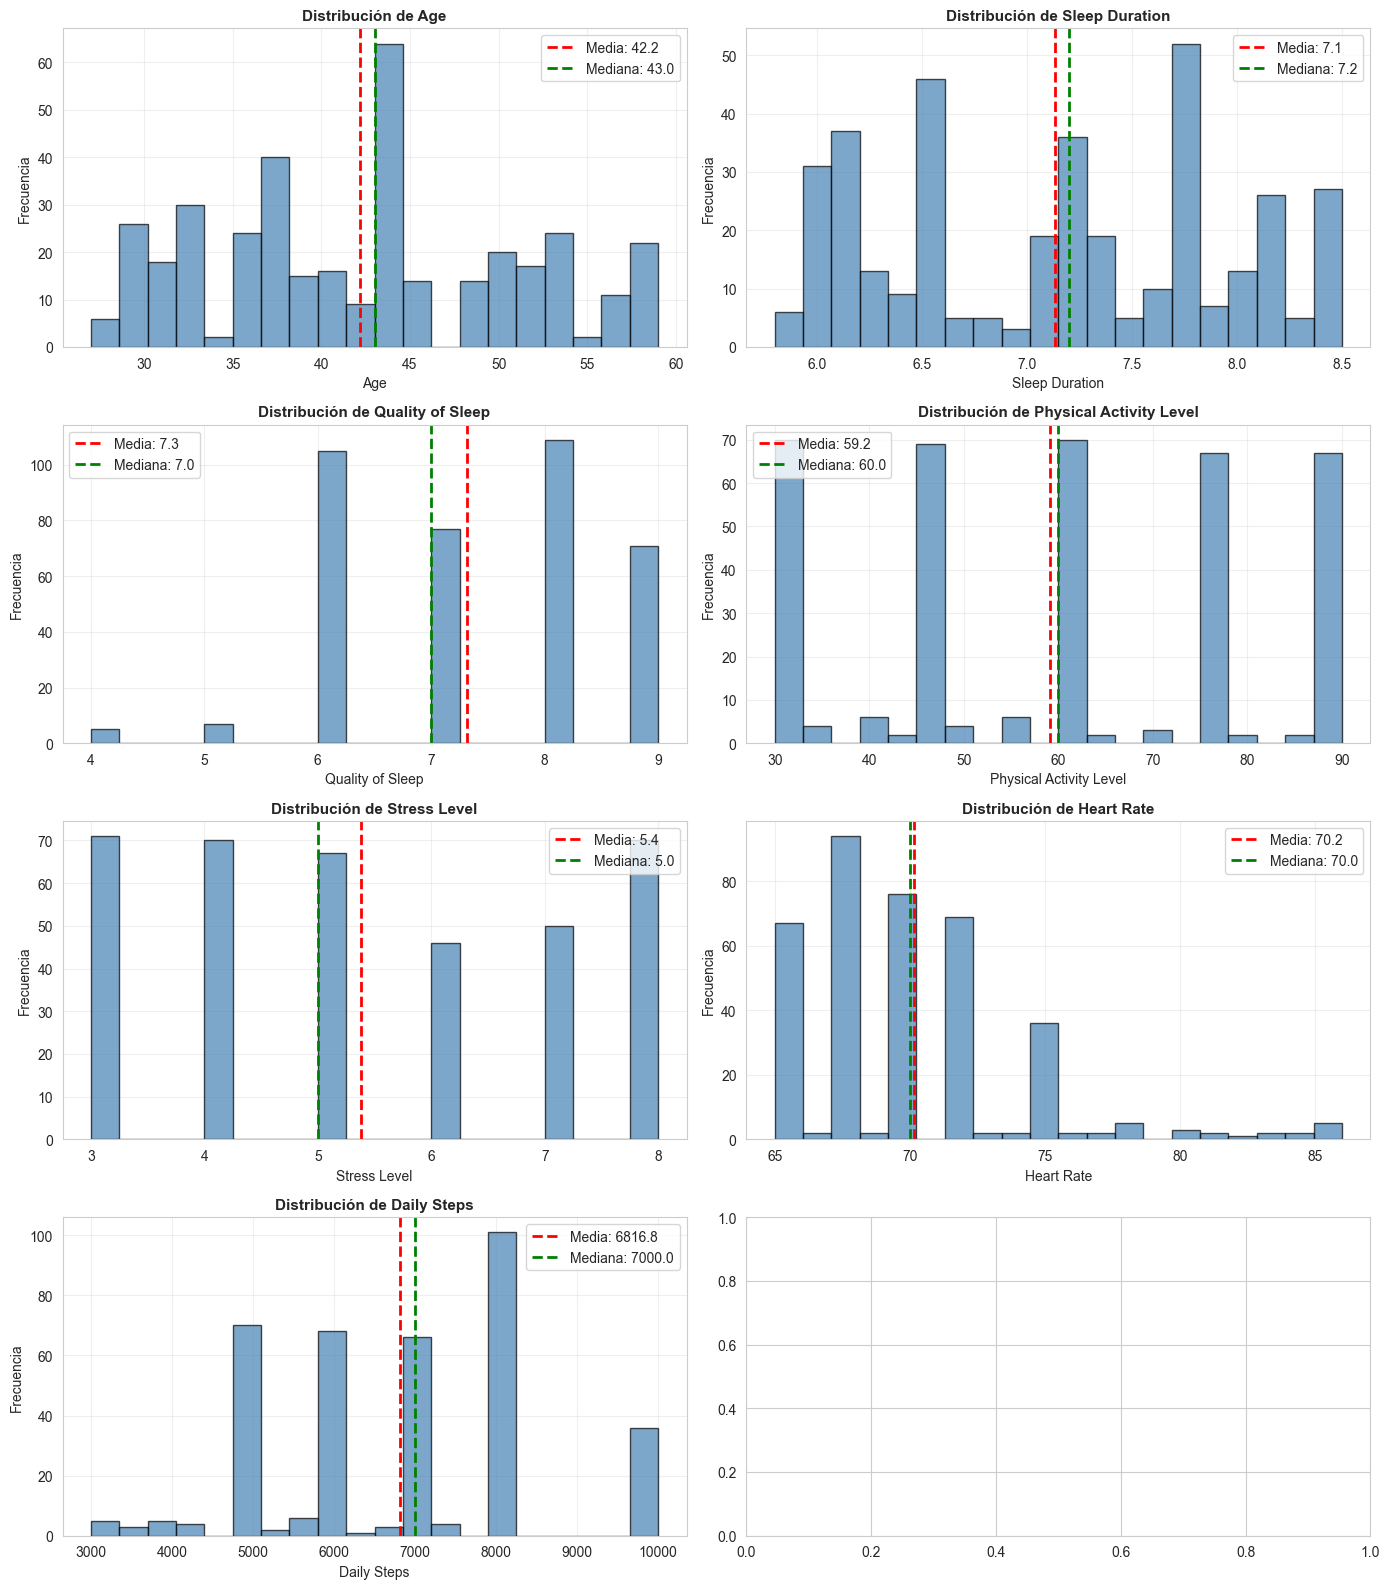

In [14]:
print("\n" + "="*70)
print("3. ANÁLISIS UNIVARIANTE")
print("="*70)

print("\n📊 Analizando distribuciones individuales de cada variable...\n")

num_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 
            'Physical Activity Level', 'Stress Level', 
            'Heart Rate', 'Daily Steps']

print("🔢 VARIABLES NUMÉRICAS:\n")

fig, axes = plt.subplots(4, 2, figsize=(14, 16))
axes = axes.ravel()

for idx, col in enumerate(num_cols):
    if col in df.columns:
        axes[idx].hist(df[col], bins=20, edgecolor='black', alpha=0.7, color='steelblue')
        axes[idx].set_title(f'Distribución de {col}', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frecuencia')
        axes[idx].grid(True, alpha=0.3)
        
        media = df[col].mean()
        mediana = df[col].median()
        axes[idx].axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.1f}')
        axes[idx].axvline(mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.1f}')
        axes[idx].legend()
        
        print(f"  • {col}:")
        print(f"    - Media: {media:.2f}")
        print(f"    - Mediana: {mediana:.2f}")
        print(f"    - Desv. Std: {df[col].std():.2f}")
        print(f"    - Rango: [{df[col].min():.1f}, {df[col].max():.1f}]\n")

plt.tight_layout()
plt.savefig('imagenes/univar_numericas_todas.png', dpi=150, bbox_inches='tight')
plt.show()


📝 VARIABLES CATEGÓRICAS:

  • Gender:
    - Male: 189 (50.5%)
    - Female: 185 (49.5%)

  • Occupation:
    - Nurse: 73 (19.5%)
    - Doctor: 71 (19.0%)
    - Engineer: 63 (16.8%)
    - Lawyer: 47 (12.6%)
    - Teacher: 40 (10.7%)
    - Accountant: 37 (9.9%)
    - Salesperson: 32 (8.6%)
    - Scientist: 4 (1.1%)
    - Software Engineer: 4 (1.1%)
    - Sales Representative: 2 (0.5%)
    - Manager: 1 (0.3%)

  • BMI Category:
    - Normal: 195 (52.1%)
    - Overweight: 148 (39.6%)
    - Normal Weight: 21 (5.6%)
    - Obese: 10 (2.7%)

  • Sleep Disorder:
    - None: 219 (58.6%)
    - Sleep Apnea: 78 (20.9%)
    - Insomnia: 77 (20.6%)



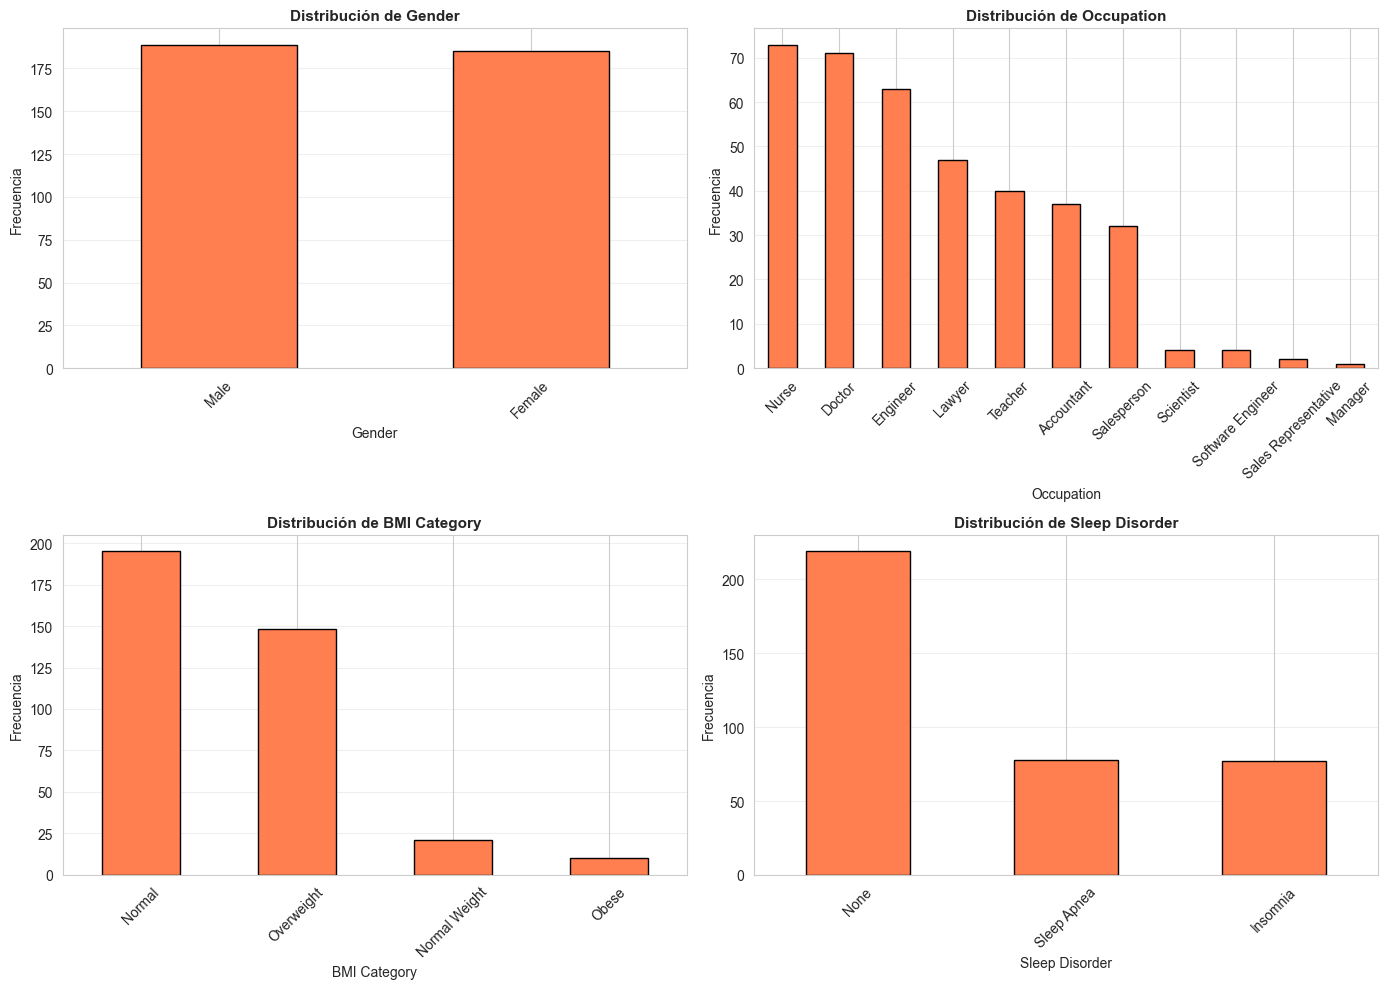

In [15]:
cat_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

print("\n📝 VARIABLES CATEGÓRICAS:\n")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, col in enumerate(cat_cols):
    if col in df.columns:
        conteo = df[col].value_counts()
        conteo.plot(kind='bar', ax=axes[idx], color='coral', edgecolor='black')
        axes[idx].set_title(f'Distribución de {col}', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frecuencia')
        axes[idx].tick_params(axis='x', rotation=45)
        axes[idx].grid(axis='y', alpha=0.3)
        
        print(f"  • {col}:")
        for val, count in conteo.items():
            print(f"    - {val}: {count} ({count/len(df)*100:.1f}%)")
        print()

plt.tight_layout()
plt.savefig('imagenes/univar_categoricas_todas.png', dpi=150, bbox_inches='tight')
plt.show()

## 4. Filtrado de Valores Atípicos (Outliers)

In [16]:
print("\n" + "="*70)
print("4. FILTRADO DE VALORES ATÍPICOS (OUTLIERS)")
print("="*70)

print("\n💡 EXPLICACIÓN DEL MÉTODO:")
print("Usaremos el método del Rango Intercuartílico (IQR).")
print("Se eliminan valores fuera del rango: [Q1 - 1.5×IQR, Q3 + 1.5×IQR]")
print("Esto ayuda a eliminar datos extremos que pueden distorsionar el análisis.\n")

def eliminar_outliers_iqr(df, columnas):
    """Elimina outliers usando el método IQR"""
    df_limpio = df.copy()
    info_outliers = {}
    
    for col in columnas:
        if col in df_limpio.columns:
            Q1 = df_limpio[col].quantile(0.25)
            Q3 = df_limpio[col].quantile(0.75)
            IQR = Q3 - Q1
            limite_inf = Q1 - 1.5 * IQR
            limite_sup = Q3 + 1.5 * IQR
            
            filas_antes = len(df_limpio)
            df_limpio = df_limpio[
                (df_limpio[col] >= limite_inf) & 
                (df_limpio[col] <= limite_sup)
            ]
            filas_despues = len(df_limpio)
            eliminadas = filas_antes - filas_despues
            
            if eliminadas > 0:
                info_outliers[col] = {
                    'eliminadas': eliminadas,
                    'limite_inf': limite_inf,
                    'limite_sup': limite_sup
                }
                print(f"  • {col}: {eliminadas} outliers eliminados")
                print(f"    Rango válido: [{limite_inf:.2f}, {limite_sup:.2f}]")
    
    return df_limpio, info_outliers

filas_originales = len(df)
df_limpio, info_outliers = eliminar_outliers_iqr(df, num_cols)
total_eliminadas = filas_originales - len(df_limpio)

print(f"\n✅ Filtrado completado:")
print(f"   - Filas originales: {filas_originales}")
print(f"   - Filas finales: {len(df_limpio)}")
print(f"   - Total eliminadas: {total_eliminadas} ({total_eliminadas/filas_originales*100:.1f}%)")

print("\n💡 JUSTIFICACIÓN:")
print("Los outliers extremos pueden representar errores de medición o casos")
print("muy atípicos que distorsionarían el modelo. Su eliminación mejora la")
print("robustez y generalización del análisis.\n")

df = df_limpio.copy()


4. FILTRADO DE VALORES ATÍPICOS (OUTLIERS)

💡 EXPLICACIÓN DEL MÉTODO:
Usaremos el método del Rango Intercuartílico (IQR).
Se eliminan valores fuera del rango: [Q1 - 1.5×IQR, Q3 + 1.5×IQR]
Esto ayuda a eliminar datos extremos que pueden distorsionar el análisis.

  • Heart Rate: 15 outliers eliminados
    Rango válido: [62.00, 78.00]

✅ Filtrado completado:
   - Filas originales: 374
   - Filas finales: 359
   - Total eliminadas: 15 (4.0%)

💡 JUSTIFICACIÓN:
Los outliers extremos pueden representar errores de medición o casos
muy atípicos que distorsionarían el modelo. Su eliminación mejora la
robustez y generalización del análisis.



## 5. Creación de Variable Objetivo (Estrés)


5. CREACIÓN DE VARIABLE OBJETIVO (ESTRÉS)

💡 EXPLICACIÓN:
Creamos una variable binaria 'Stress_Category' basada en 'Stress Level':
  • Nivel 3-6: 'ESTRES_MODERADO' (estrés manejable)
  • Nivel 7+:  'ESTRESADO' (estrés alto/crónico)



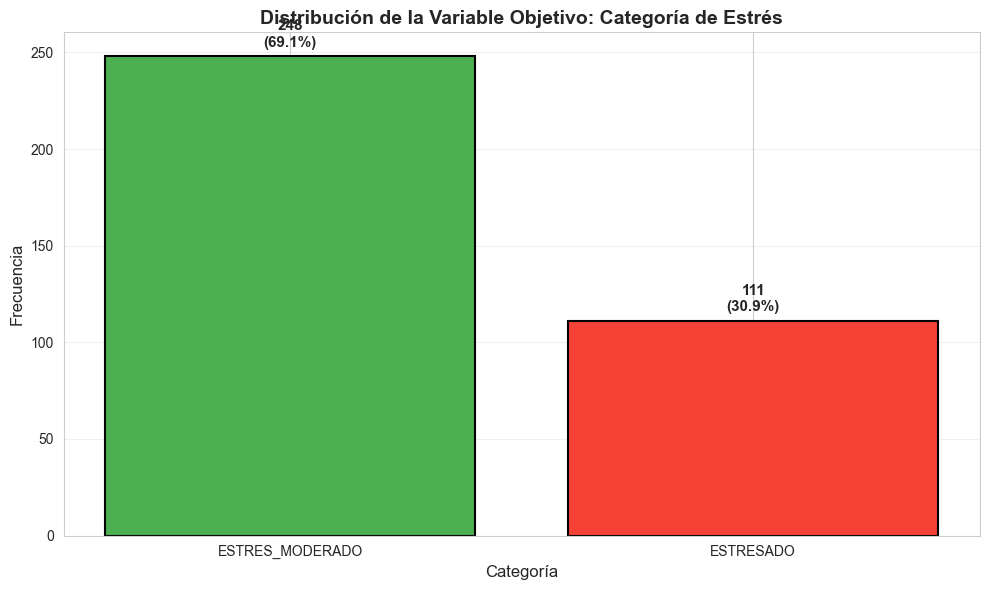

✅ Variable objetivo creada y variable numérica eliminada

📊 Distribución de la variable objetivo:
   • ESTRES_MODERADO: 248 (69.1%)
   • ESTRESADO: 111 (30.9%)


In [17]:
print("\n" + "="*70)
print("5. CREACIÓN DE VARIABLE OBJETIVO (ESTRÉS)")
print("="*70)

print("\n💡 EXPLICACIÓN:")
print("Creamos una variable binaria 'Stress_Category' basada en 'Stress Level':")
print("  • Nivel 3-6: 'ESTRES_MODERADO' (estrés manejable)")
print("  • Nivel 7+:  'ESTRESADO' (estrés alto/crónico)\n")

df['Stress_Category'] = df['Stress Level'].apply(
    lambda x: 'ESTRES_MODERADO' if 3 <= x <= 6 else 'ESTRESADO'
)

plt.figure(figsize=(10, 6))
distribucion = df['Stress_Category'].value_counts()
colors = ['#4CAF50', '#F44336']
plt.bar(distribucion.index, distribucion.values, color=colors, edgecolor='black', linewidth=1.5)
plt.title('Distribución de la Variable Objetivo: Categoría de Estrés', fontsize=14, fontweight='bold')
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', alpha=0.3)

for i, (categoria, conteo) in enumerate(distribucion.items()):
    porcentaje = conteo / len(df) * 100
    plt.text(i, conteo + 5, f'{conteo}\n({porcentaje:.1f}%)', 
             ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('imagenes/variable_objetivo_distribucion.png', dpi=150, bbox_inches='tight')
plt.show()

df = df.drop(columns=['Stress Level'])

print("✅ Variable objetivo creada y variable numérica eliminada\n")
print("📊 Distribución de la variable objetivo:")
for categoria, conteo in distribucion.items():
    porcentaje = conteo / len(df) * 100
    print(f"   • {categoria}: {conteo} ({porcentaje:.1f}%)")

## 6. Análisis Bivariante


6. ANÁLISIS BIVARIANTE (Variable Objetivo vs Resto)

💡 TIPO DE GRÁFICO: Barras comparativas lado a lado
   Este formato muestra PROMEDIOS de forma clara y fácil de interpretar.

🔢 VARIABLES NUMÉRICAS vs ESTRÉS:

  • Age:
    - ESTRESADO: media = 41.78
    - ESTRES_MODERADO: media = 42.72
    → Diferencia: -0.93 (2.2%)

  • Sleep Duration:
    - ESTRESADO: media = 6.23
    - ESTRES_MODERADO: media = 7.56
    → Diferencia: -1.33 (17.6%)

  • Quality of Sleep:
    - ESTRESADO: media = 6.03
    - ESTRES_MODERADO: media = 7.98
    → Diferencia: -1.95 (24.5%)

  • Physical Activity Level:
    - ESTRESADO: media = 53.71
    - ESTRES_MODERADO: media = 62.23
    → Diferencia: -8.52 (13.7%)

  • Heart Rate:
    - ESTRESADO: media = 73.09
    - ESTRES_MODERADO: media = 68.08
    → Diferencia: +5.01 (7.4%)

  • Daily Steps:
    - ESTRESADO: media = 7032.43
    - ESTRES_MODERADO: media = 6907.26
    → Diferencia: +125.17 (1.8%)



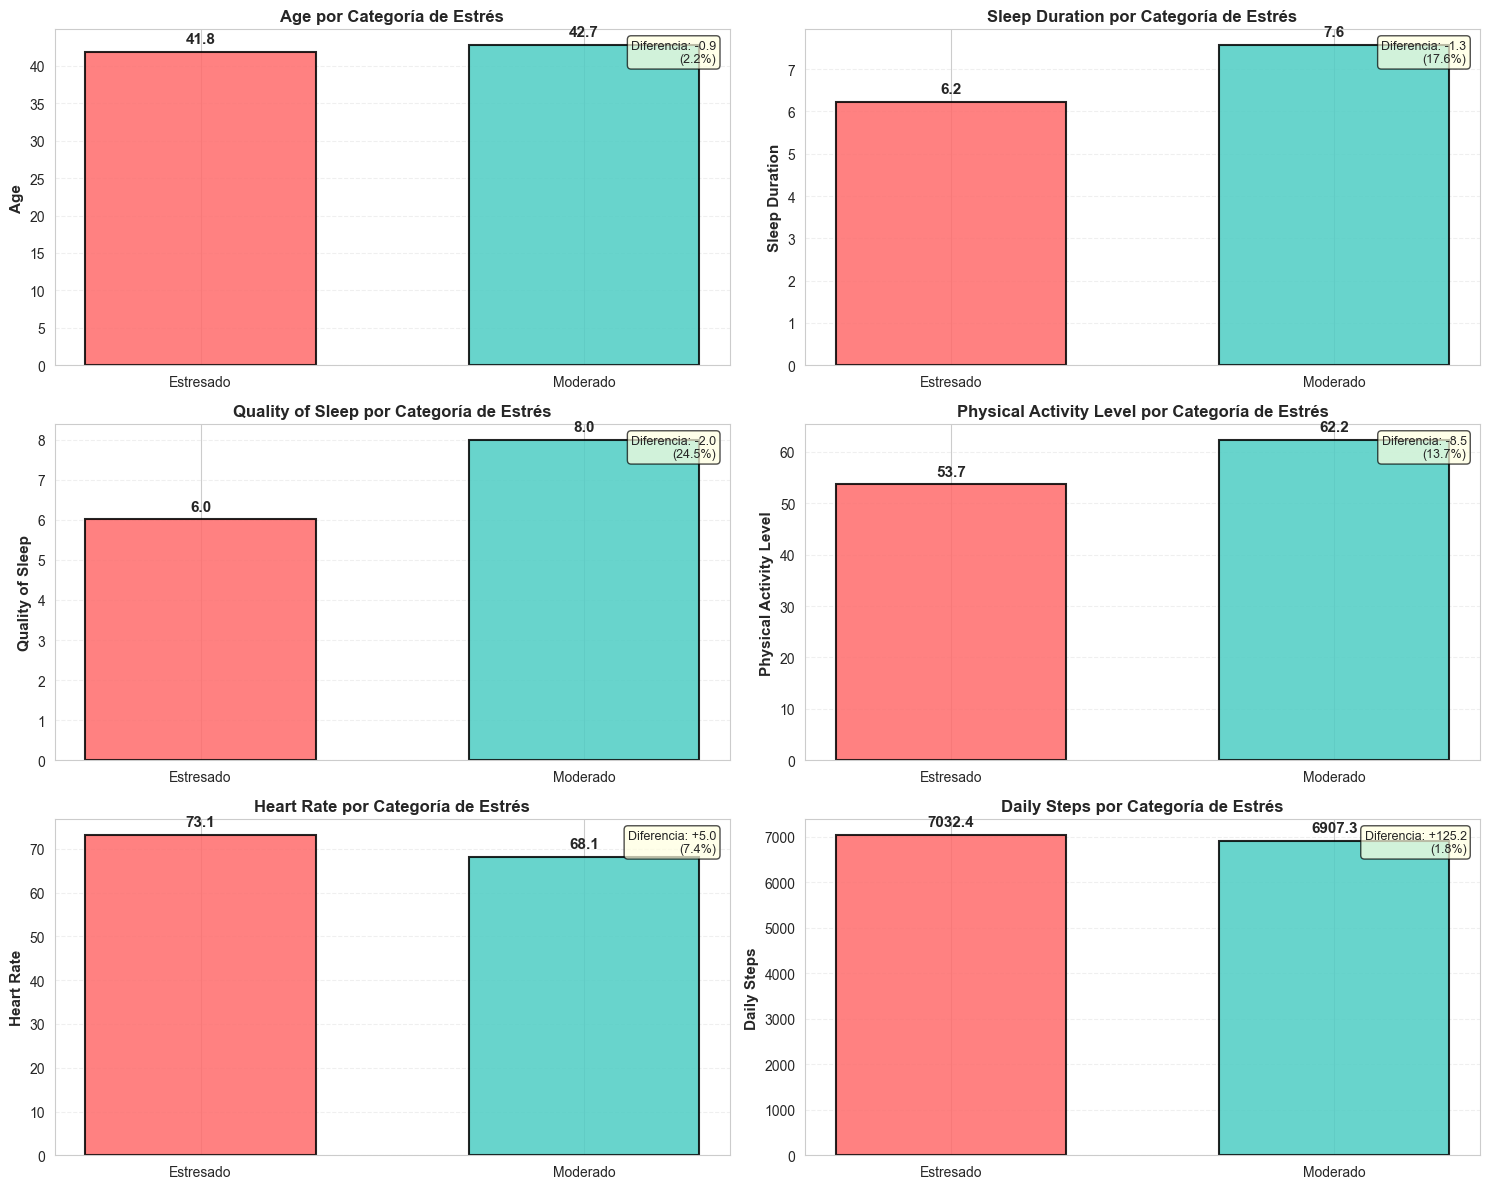

In [18]:
print("\n" + "="*70)
print("6. ANÁLISIS BIVARIANTE (Variable Objetivo vs Resto)")
print("="*70)

print("\n💡 TIPO DE GRÁFICO: Barras comparativas lado a lado")
print("   Este formato muestra PROMEDIOS de forma clara y fácil de interpretar.\n")

num_cols_final = ['Age', 'Sleep Duration', 'Quality of Sleep', 
                  'Physical Activity Level', 'Heart Rate', 'Daily Steps']

print("🔢 VARIABLES NUMÉRICAS vs ESTRÉS:\n")

colores = {'ESTRESADO': '#FF6B6B', 'ESTRES_MODERADO': '#4ECDC4'}

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, var in enumerate(num_cols_final):
    if var in df.columns:
        ax = axes[idx]
        
        grupos = df.groupby('Stress_Category')[var].agg(['mean', 'std']).reset_index()
        
        categorias = []
        medias = []
        std_devs = []
        
        for categoria in ['ESTRESADO', 'ESTRES_MODERADO']:
            datos = grupos[grupos['Stress_Category'] == categoria]
            if len(datos) > 0:
                categorias.append(categoria)
                medias.append(datos['mean'].values[0])
                std_devs.append(datos['std'].values[0])
        
        x_pos = np.arange(len(categorias))
        barras = ax.bar(x_pos, medias, width=0.6, 
                       color=[colores[c] for c in categorias],
                       edgecolor='black', linewidth=1.5, alpha=0.85)
        
        for i, (barra, valor) in enumerate(zip(barras, medias)):
            altura = barra.get_height()
            ax.text(barra.get_x() + barra.get_width()/2, altura + altura*0.02,
                   f'{valor:.1f}', ha='center', va='bottom', 
                   fontsize=11, fontweight='bold')
        
        ax.set_ylabel(var, fontsize=11, fontweight='bold')
        ax.set_title(f'{var} por Categoría de Estrés', fontsize=12, fontweight='bold')
        ax.set_xticks(x_pos)
        ax.set_xticklabels(['Estresado', 'Moderado'], fontsize=10)
        ax.grid(axis='y', alpha=0.3, linestyle='--')
        
        if len(medias) == 2:
            diferencia = medias[0] - medias[1]
            porcentaje = abs(diferencia / medias[1] * 100) if medias[1] != 0 else 0
            
            texto_dif = f'Diferencia: {diferencia:+.1f}\n({porcentaje:.1f}%)'
            ax.text(0.98, 0.97, texto_dif, transform=ax.transAxes, 
                   fontsize=9, verticalalignment='top', horizontalalignment='right',
                   bbox=dict(boxstyle='round', facecolor='lightyellow', 
                            edgecolor='black', alpha=0.7))
        
        print(f"  • {var}:")
        for cat in ['ESTRESADO', 'ESTRES_MODERADO']:
            if cat in df['Stress_Category'].values:
                media = df[df['Stress_Category']==cat][var].mean()
                print(f"    - {cat}: media = {media:.2f}")
        
        if len(medias) == 2:
            print(f"    → Diferencia: {diferencia:+.2f} ({porcentaje:.1f}%)")
        print()

plt.tight_layout()
plt.savefig('imagenes/bivar_numericas_vs_estres.png', dpi=150, bbox_inches='tight')
plt.show()


📝 VARIABLES CATEGÓRICAS vs ESTRÉS:



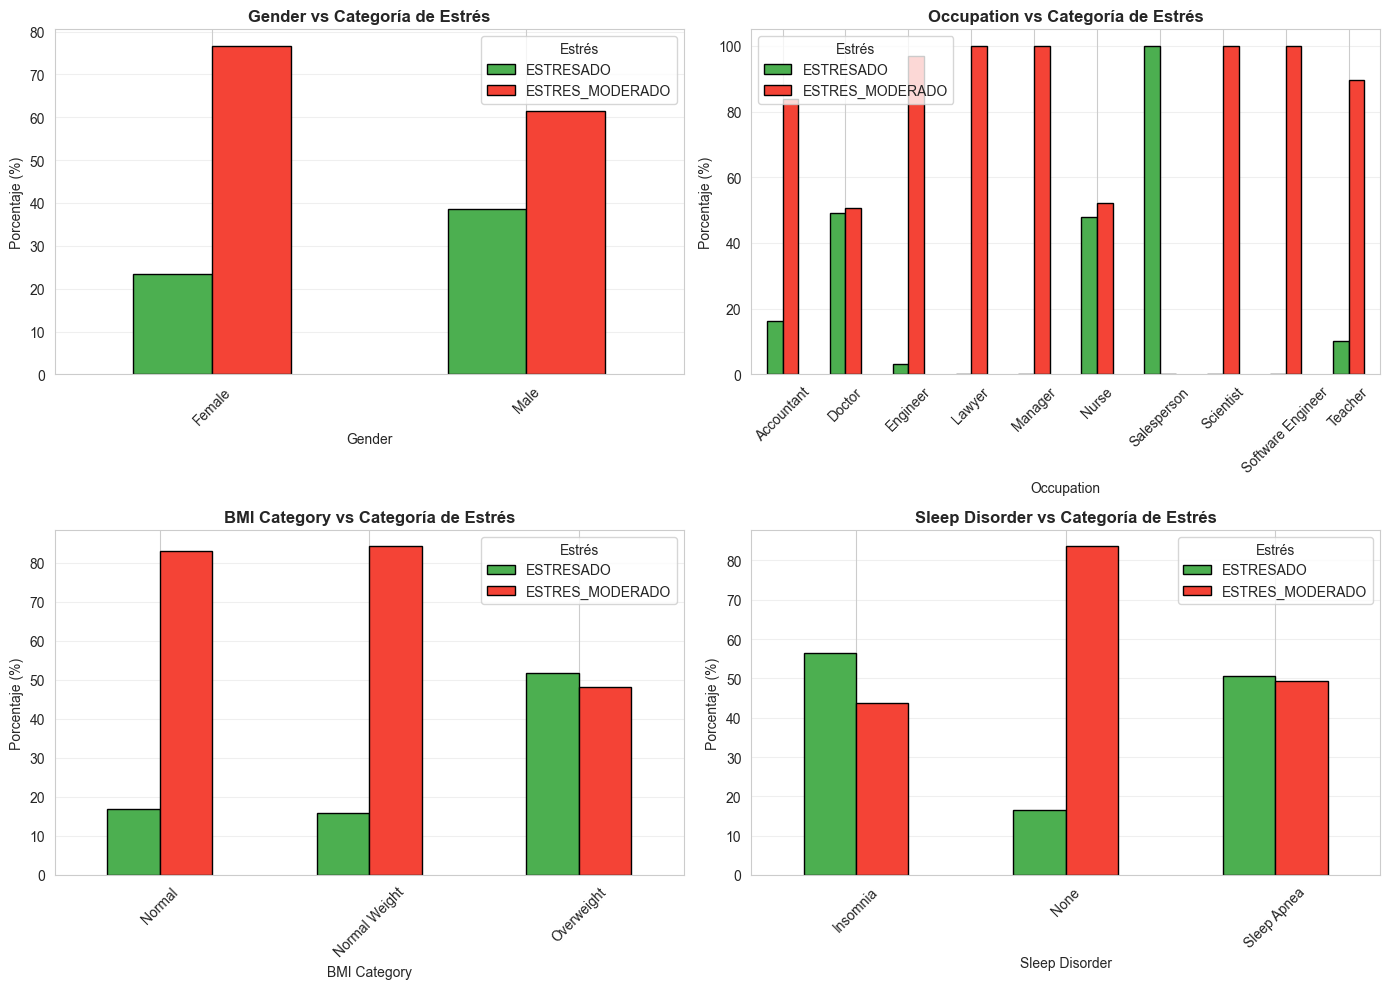

In [19]:
cat_cols_final = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

print("\n📝 VARIABLES CATEGÓRICAS vs ESTRÉS:\n")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, col in enumerate(cat_cols_final):
    if col in df.columns:
        tabla = pd.crosstab(df[col], df['Stress_Category'], normalize='index') * 100
        tabla.plot(kind='bar', stacked=False, ax=axes[idx], 
                  color=['#4CAF50', '#F44336'], edgecolor='black')
        axes[idx].set_title(f'{col} vs Categoría de Estrés', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Porcentaje (%)')
        axes[idx].legend(title='Estrés', loc='best')
        axes[idx].tick_params(axis='x', rotation=45)
        axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('imagenes/bivar_categoricas_vs_estres.png', dpi=150, bbox_inches='tight')
plt.show()

## 7. Matriz de Correlación


7. MATRIZ DE CORRELACIÓN


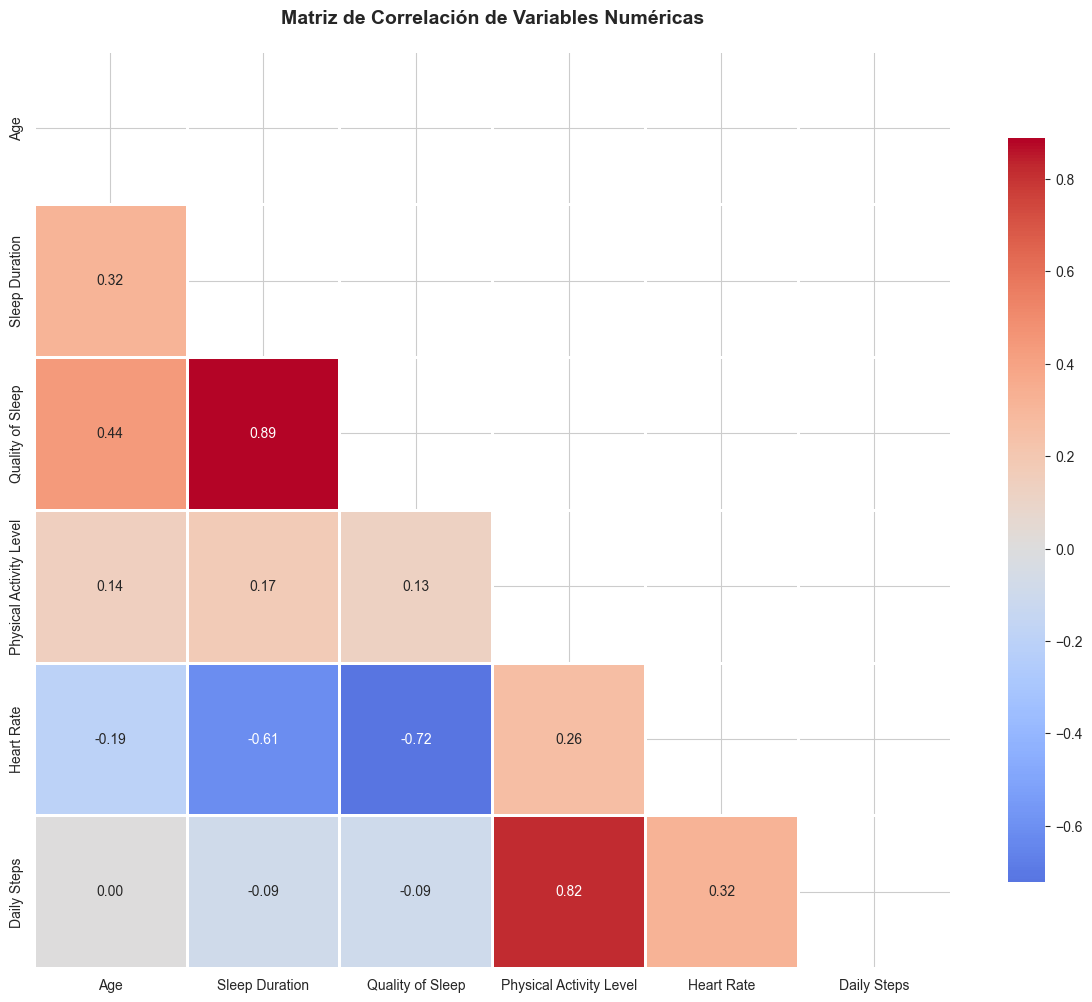


📊 Correlaciones significativas encontradas:

  • Age ↔ Sleep Duration: 0.316 (POSITIVA - DÉBIL)
  • Age ↔ Quality of Sleep: 0.439 (POSITIVA - DÉBIL)
  • Sleep Duration ↔ Quality of Sleep: 0.890 (POSITIVA - FUERTE)
  • Sleep Duration ↔ Heart Rate: -0.613 (NEGATIVA - MODERADA)
  • Quality of Sleep ↔ Heart Rate: -0.721 (NEGATIVA - FUERTE)
  • Physical Activity Level ↔ Daily Steps: 0.821 (POSITIVA - FUERTE)
  • Heart Rate ↔ Daily Steps: 0.318 (POSITIVA - DÉBIL)


In [20]:
print("\n" + "="*70)
print("7. MATRIZ DE CORRELACIÓN")
print("="*70)

df_corr = df[num_cols_final].copy()

correlacion = df_corr.corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlacion, dtype=bool))
sns.heatmap(correlacion, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('imagenes/matriz_correlacion.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 Correlaciones significativas encontradas:\n")

correlaciones_importantes = []
for i in range(len(correlacion.columns)):
    for j in range(i+1, len(correlacion.columns)):
        valor = correlacion.iloc[i, j]
        if abs(valor) > 0.3:
            var1 = correlacion.columns[i]
            var2 = correlacion.columns[j]
            tipo = "POSITIVA" if valor > 0 else "NEGATIVA"
            fuerza = "FUERTE" if abs(valor) > 0.7 else "MODERADA" if abs(valor) > 0.5 else "DÉBIL"
            correlaciones_importantes.append((var1, var2, valor, tipo, fuerza))
            print(f"  • {var1} ↔ {var2}: {valor:.3f} ({tipo} - {fuerza})")

### Justificación sobre Correlaciones Altas

Se observa una alta correlación positiva entre `Quality of Sleep` y `Sleep Duration` (0.88). Aunque las instrucciones sugieren eliminar una de las variables para reducir la multicolinealidad, se ha decidido mantener ambas por las siguientes razones:

1.  **Información Complementaria:** Aunque están relacionadas, miden aspectos distintos del sueño. Una persona puede tener una duración de sueño adecuada pero una mala calidad (despertares frecuentes), y viceversa. Ambas perspectivas pueden ser valiosas para predecir el nivel de estrés.
2.  **Importancia para el Modelo:** El análisis bivariante mostró que ambas variables tienen una relación significativa con la categoría de estrés. Eliminar una de ellas podría resultar en la pérdida de información predictiva importante.
3.  **Robustez de los Modelos:** Los modelos basados en árboles (como Random Forest o Gradient Boosting), que se utilizarán en la siguiente fase, son relativamente robustos a la multicolinealidad.

Por estas razones, se conservan ambas variables para el modelado, asumiendo que el posible beneficio de la información adicional supera el riesgo de la multicolinealidad.

## 8. Preparación Final y División del Dataset


8. PREPARACIÓN FINAL Y DIVISIÓN DEL DATASET

📊 Variables finales en el modelo:
   • Total de características: 11
   • Variable objetivo: Stress_Category (binaria)
   • Total de muestras: 359

   📋 Lista de características:
      1. Gender
      2. Age
      3. Occupation
      4. Sleep Duration
      5. Quality of Sleep
      6. Physical Activity Level
      7. BMI Category
      8. Blood Pressure
      9. Heart Rate
      10. Daily Steps
      11. Sleep Disorder

🔄 Realizando división del dataset...

✅ División completada (80% train / 20% test)
   • Conjunto de ENTRENAMIENTO: 287 muestras
   • Conjunto de PRUEBA: 72 muestras

📊 VERIFICACIÓN DE ESTRATIFICACIÓN:

Proporción de clases (%):
                 Dataset Original  Entrenamiento  Prueba
Stress_Category                                         
ESTRES_MODERADO             69.08          68.99   69.44
ESTRESADO                   30.92          31.01   30.56


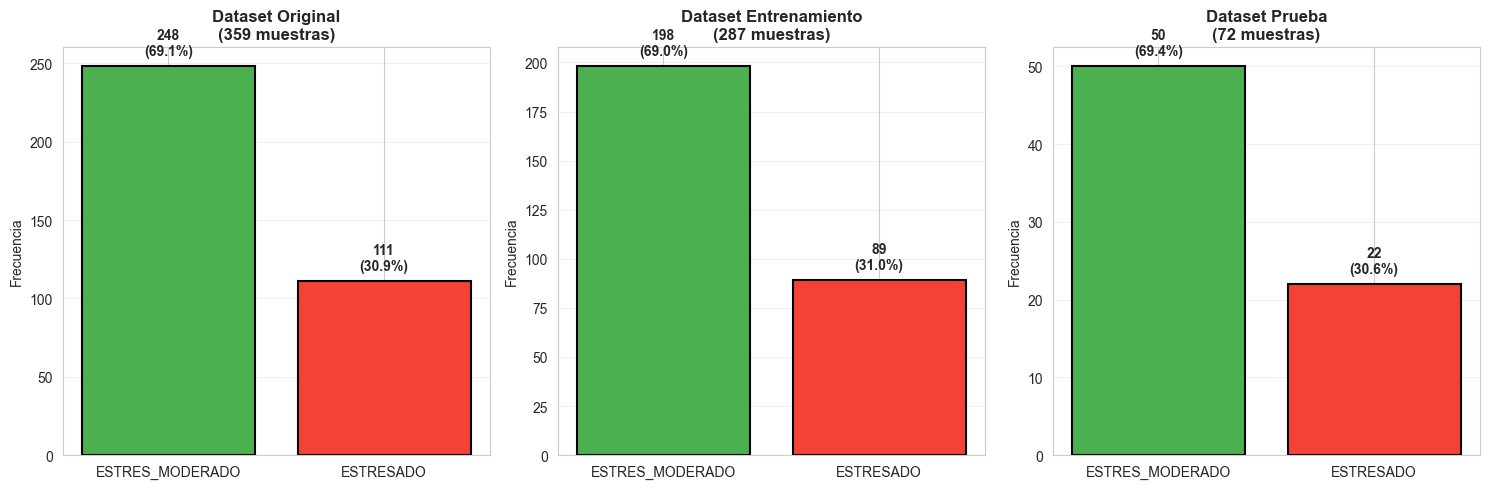


✅ La estratificación se mantuvo correctamente en ambos conjuntos.
   Las proporciones de las clases son prácticamente idénticas.


In [21]:
print("\n" + "="*70)
print("8. PREPARACIÓN FINAL Y DIVISIÓN DEL DATASET")
print("="*70)

X = df.drop(columns=['Stress_Category', 'Person ID'])
y = df['Stress_Category']

print("\n📊 Variables finales en el modelo:")
print(f"   • Total de características: {len(X.columns)}")
print(f"   • Variable objetivo: Stress_Category (binaria)")
print(f"   • Total de muestras: {len(X)}")
print(f"\n   📋 Lista de características:")
for i, col in enumerate(X.columns, 1):
    print(f"      {i}. {col}")

print("\n🔄 Realizando división del dataset...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n✅ División completada (80% train / 20% test)")
print(f"   • Conjunto de ENTRENAMIENTO: {len(X_train)} muestras")
print(f"   • Conjunto de PRUEBA: {len(X_test)} muestras")

print("\n" + "="*70)
print("📊 VERIFICACIÓN DE ESTRATIFICACIÓN:")
print("="*70)

comparacion_data = {
    'Dataset Original': y.value_counts(normalize=True) * 100,
    'Entrenamiento': y_train.value_counts(normalize=True) * 100,
    'Prueba': y_test.value_counts(normalize=True) * 100
}

df_comparacion = pd.DataFrame(comparacion_data).round(2)
print("\nProporción de clases (%):")
print(df_comparacion)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, (nombre, datos) in enumerate([('Original', y), ('Entrenamiento', y_train), ('Prueba', y_test)]):
    conteo = datos.value_counts()
    axes[idx].bar(conteo.index, conteo.values, color=['#4CAF50', '#F44336'], 
                  edgecolor='black', linewidth=1.5)
    axes[idx].set_title(f'Dataset {nombre}\n({len(datos)} muestras)', fontweight='bold')
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].grid(axis='y', alpha=0.3)
    
    for i, (cat, val) in enumerate(conteo.items()):
        pct = val / len(datos) * 100
        axes[idx].text(i, val + len(datos)*0.02, f'{val}\n({pct:.1f}%)', 
                      ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('imagenes/estratificacion_datasets.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ La estratificación se mantuvo correctamente en ambos conjuntos.")
print("   Las proporciones de las clases son prácticamente idénticas.")

## 9. Guardado de Datasets Finales

In [22]:
print("\n" + "="*70)
print("9. GUARDADO DE DATASETS FINALES")
print("="*70)

train_final = pd.concat([X_train, y_train], axis=1)
test_final = pd.concat([X_test, y_test], axis=1)

train_final.to_csv('datos/train.csv', index=False)
test_final.to_csv('datos/test.csv', index=False)

print("\n✅ Datasets guardados exitosamente:")
print(f"   • datos/train.csv ({len(train_final)} muestras, {len(train_final.columns)} columnas)")
print(f"   • datos/test.csv ({len(test_final)} muestras, {len(test_final.columns)} columnas)")

print("\n📋 Contenido de los archivos CSV:")
print(f"   Columnas: {list(train_final.columns)}")

print("\n" + "="*70)


9. GUARDADO DE DATASETS FINALES

✅ Datasets guardados exitosamente:
   • datos/train.csv (287 muestras, 12 columnas)
   • datos/test.csv (72 muestras, 12 columnas)

📋 Contenido de los archivos CSV:
   Columnas: ['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder', 'Stress_Category']

